In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import sem
from archpy import arch

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [5]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [6]:
tsla = pd.read_csv("TSLA.csv")

In [7]:
tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2459,2020-04-06,511.200012,521.000000,497.959991,516.239990,516.239990,14901800
2460,2020-04-07,545.000000,565.000000,532.340027,545.450012,545.450012,17919800
2461,2020-04-08,554.200012,557.210022,533.330017,548.840027,548.840027,12656000
2462,2020-04-09,562.090027,575.179993,557.109985,573.000000,573.000000,13650000


In [8]:
cls = tsla['Close']

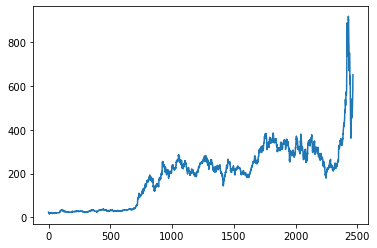

In [9]:
plt.plot(cls)

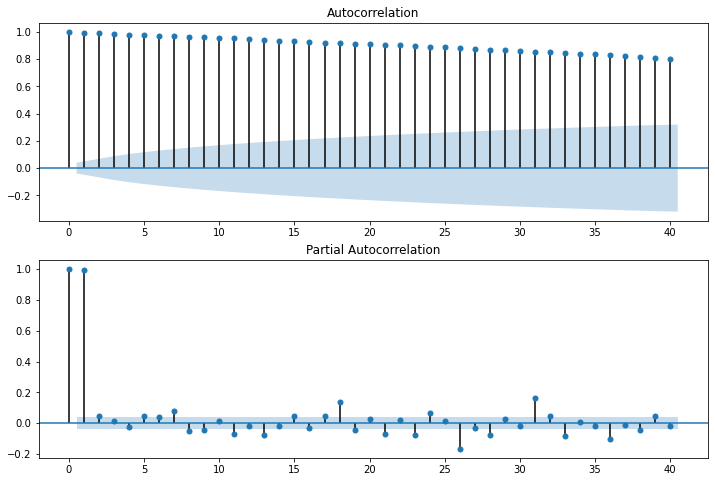

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cls.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cls, lags=40, ax=ax2)


In [12]:
arma_mod20 = sm.tsa.ARMA(cls, (1,0)).fit(disp=False)
print(arma_mod20.params)

const          256.532442
ar.L1.Close      0.998882
dtype: float64


In [36]:
arma_mod30 = sm.tsa.ARMA(cls, (7,0)).fit(disp=False)
print(arma_mod30.params)

const          253.689118
ar.L1.Close      1.051862
ar.L2.Close     -0.046725
ar.L3.Close      0.052107
ar.L4.Close     -0.110021
ar.L5.Close      0.054752
ar.L6.Close     -0.094037
ar.L7.Close      0.090965
dtype: float64


In [37]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


18288.972477172116 18341.258349093998 18307.968709364122


In [38]:
sm.stats.durbin_watson(arma_mod30.resid.values)


1.7893312228141258

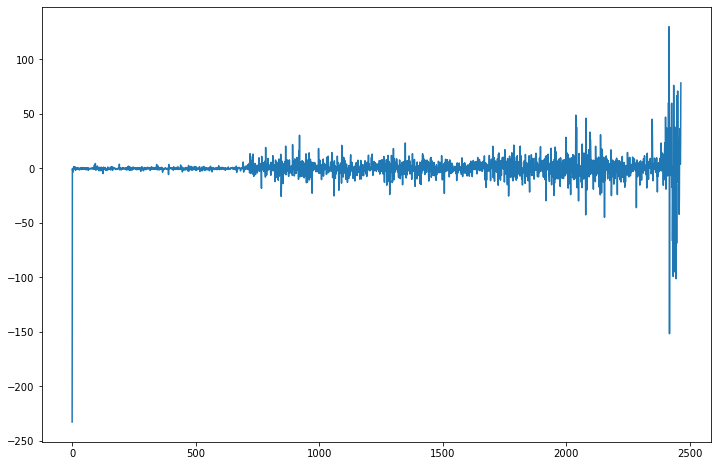

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);


In [48]:
resid = arma_mod20.resid


In [49]:
stats.normaltest(resid)


NormaltestResult(statistic=2569.8165657755612, pvalue=0.0)

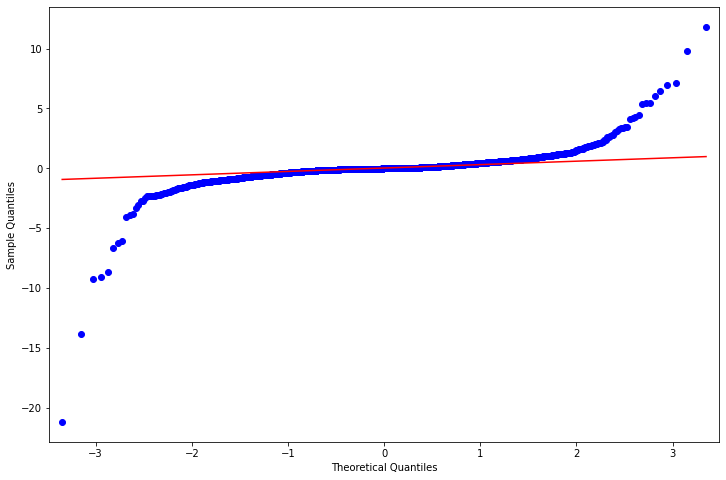

In [50]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

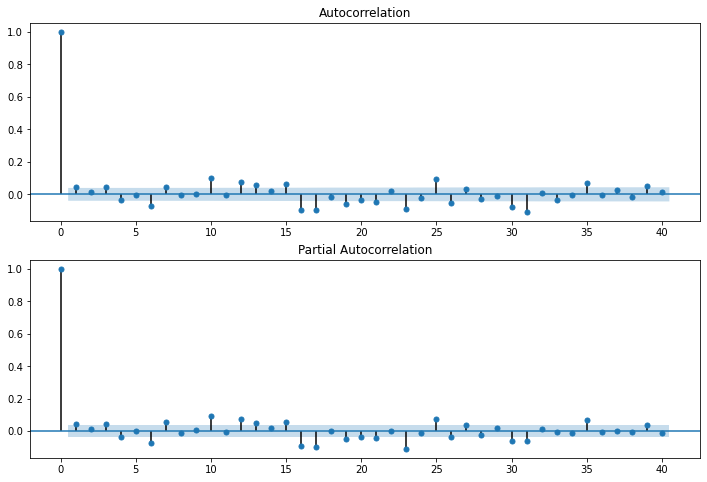

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [52]:

r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.042223    4.398171  3.597749e-02
2.0   0.014464    4.914464  8.567176e-02
3.0   0.044763    9.861725  1.977885e-02
4.0  -0.035228   12.927028  1.163791e-02
5.0  -0.003341   12.954607  2.380788e-02
6.0  -0.072220   25.848023  2.376326e-04
7.0   0.044057   30.648143  7.218392e-05
8.0  -0.005106   30.712633  1.580451e-04
9.0  -0.000484   30.713212  3.314960e-04
10.0  0.098713   54.840570  3.382162e-08
11.0 -0.002990   54.862715  8.211378e-08
12.0  0.078654   70.193018  2.947406e-10
13.0  0.057573   78.410214  2.194234e-11
14.0  0.022272   79.640498  3.298937e-11
15.0  0.060785   88.807660  1.654431e-12
16.0 -0.096918  112.122357  1.769548e-16
17.0 -0.096271  135.136352  1.912556e-20
18.0 -0.016542  135.816114  4.085630e-20
19.0 -0.059942  144.745512  2.249431e-21
20.0 -0.032704  147.404632  1.971141e-21
21.0 -0.045939  152.653692  5.490390e-22
22.0  0.022916  153.960318  8.540117e-22
23.0 -0.091119  

In [53]:
cls

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2459    516.239990
2460    545.450012
2461    548.840027
2462    573.000000
2463    650.950012
Name: Close, Length: 2464, dtype: float64

In [54]:
predictions = arma_mod20.predict(1970, 2464, dynamic=True)
print(predictions)

1970    280.662988
1971    280.636004
1972    280.609051
1973    280.582127
1974    280.555234
           ...    
2460    270.479006
2461    270.463410
2462    270.447832
2463    270.432271
2464    270.416728
Length: 495, dtype: float64


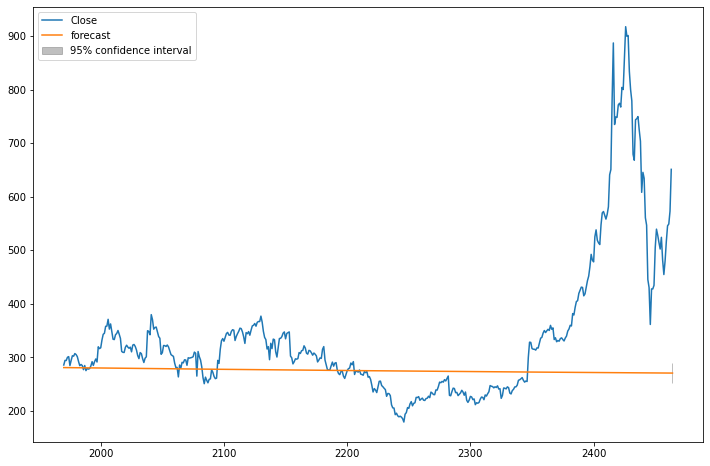

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = cls.loc[1970:].plot(ax=ax)
fig = arma_mod20.plot_predict(1970, 2464, dynamic=True, ax=ax, plot_insample=False)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2463
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -9122.453
Method:                       css-mle   S.D. of innovations              9.824
Date:                Wed, 20 May 2020   AIC                          18262.905
Time:                        21:19:30   BIC                          18315.188
Sample:                             1   HQIC                         18281.901
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2536      0.207      1.224      0.221      -0.153       0.660
ar.L1.D.Close     0.0574      0.020      2.821      0.005       0.018       0.097
ar.L2.D.Close     0.0052      0.020     

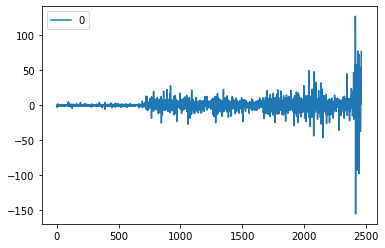

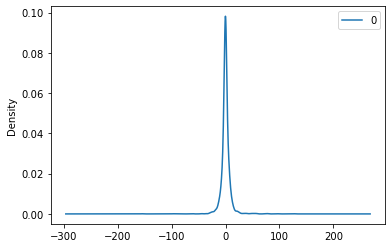

                 0
count  2463.000000
mean     -0.000135
std       9.826091
min    -155.375449
25%      -2.345098
50%      -0.173066
75%       2.165888
max     127.071150


In [73]:
model = ARIMA(cls, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [27]:
avoc1 = cls

predicted=285.786809, expected=294.079987
predicted=294.539737, expected=293.899994
predicted=294.024862, expected=299.920013
predicted=300.283264, expected=301.149994
predicted=301.331940, expected=284.450012
predicted=283.947011, expected=294.089996
predicted=294.553376, expected=302.769989
predicted=303.217603, expected=301.970001
predicted=302.077012, expected=306.850006
predicted=307.161644, expected=305.019989
predicted=305.092148, expected=301.059998
predicted=301.054108, expected=291.970001
predicted=291.770472, expected=284.179993
predicted=284.012968, expected=286.480011
predicted=286.693160, expected=284.540009
predicted=284.594295, expected=276.820007
predicted=276.653101, expected=284.489990
predicted=284.894807, expected=275.010010
predicted=274.801521, expected=279.070007
predicted=279.332201, expected=277.850006
predicted=277.931877, expected=278.850006
predicted=279.007635, expected=283.760010
predicted=284.052970, expected=291.720001
predicted=292.126015, expected=284

predicted=305.970618, expected=312.839996
predicted=312.819738, expected=311.809998
predicted=311.968620, expected=308.170013
predicted=308.384876, expected=303.769989
predicted=303.998641, expected=307.880005
predicted=307.922135, expected=305.640015
predicted=305.822625, expected=302.559998
predicted=302.759579, expected=291.230011
predicted=291.602624, expected=294.709991
predicted=294.759718, expected=298.769989
predicted=298.809321, expected=297.859985
predicted=298.008640, expected=314.739990
predicted=314.499127, expected=319.880005
predicted=319.909520, expected=294.790009
predicted=295.488914, expected=285.359985
predicted=285.667168, expected=276.540009
predicted=276.821387, expected=276.239990
predicted=276.363162, expected=276.589996
predicted=276.701265, expected=284.140015
predicted=284.121851, expected=290.920013
predicted=290.923326, expected=283.359985
predicted=283.620235, expected=288.959991
predicted=288.977133, expected=289.959991
predicted=290.064829, expected=275

predicted=336.447545, expected=328.920013
predicted=329.108673, expected=331.290009
predicted=331.401466, expected=329.940002
predicted=330.081092, expected=334.869995
predicted=334.961536, expected=336.200012
predicted=336.321777, expected=333.029999
predicted=333.187264, expected=330.369995
predicted=330.521607, expected=335.890015
predicted=335.976693, expected=339.529999
predicted=339.634446, expected=348.839996
predicted=348.905803, expected=352.700012
predicted=352.810851, expected=359.679993
predicted=359.772718, expected=358.390015
predicted=358.540692, expected=381.500000
predicted=381.477401, expected=378.989990
predicted=379.160570, expected=393.149994
predicted=393.185306, expected=404.040009
predicted=404.125254, expected=405.589996
predicted=405.740542, expected=419.220001
predicted=419.297564, expected=425.250000
predicted=425.384719, expected=430.940002
predicted=431.080892, expected=430.380005
predicted=430.553935, expected=414.700012
predicted=414.946539, expected=418

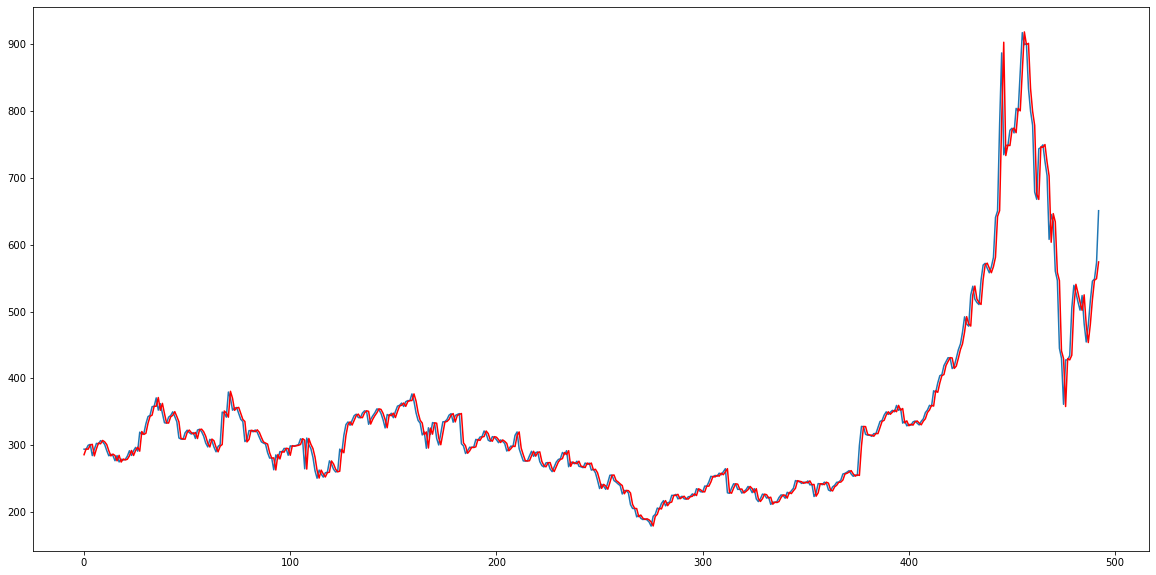

In [11]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [12]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

10.448873338060123
186.68370833001
35.61440031198204


predicted=286.276499, expected=294.079987
predicted=294.763135, expected=293.899994
predicted=293.752360, expected=299.920013
predicted=300.035336, expected=301.149994
predicted=300.979573, expected=284.450012
predicted=283.617980, expected=294.089996
predicted=294.688512, expected=302.769989
predicted=303.251175, expected=301.970001
predicted=302.208832, expected=306.850006
predicted=307.335486, expected=305.019989
predicted=304.496039, expected=301.059998
predicted=300.713175, expected=291.970001
predicted=291.960572, expected=284.179993
predicted=284.225861, expected=286.480011
predicted=287.093637, expected=284.540009
predicted=285.069888, expected=276.820007
predicted=277.035092, expected=284.489990
predicted=285.082955, expected=275.010010
predicted=274.633831, expected=279.070007
predicted=279.511244, expected=277.850006
predicted=278.030737, expected=278.850006
predicted=278.954641, expected=283.760010
predicted=284.124910, expected=291.720001
predicted=292.017558, expected=284

predicted=317.761703, expected=307.510010
predicted=307.453227, expected=305.799988
predicted=305.782937, expected=312.839996
predicted=312.683125, expected=311.809998
predicted=312.600102, expected=308.170013
predicted=308.449067, expected=303.769989
predicted=303.664081, expected=307.880005
predicted=307.813701, expected=305.640015
predicted=306.187308, expected=302.559998
predicted=302.806176, expected=291.230011
predicted=291.528502, expected=294.709991
predicted=294.540327, expected=298.769989
predicted=299.191218, expected=297.859985
predicted=298.259123, expected=314.739990
predicted=314.655425, expected=319.880005
predicted=319.714638, expected=294.790009
predicted=295.571328, expected=285.359985
predicted=285.159542, expected=276.540009
predicted=276.231995, expected=276.239990
predicted=277.309682, expected=276.589996
predicted=277.682132, expected=284.140015
predicted=283.992608, expected=290.920013
predicted=291.276720, expected=283.359985
predicted=283.470015, expected=288

predicted=349.372874, expected=352.170013
predicted=352.133294, expected=349.989990
predicted=350.170680, expected=359.519989
predicted=359.740709, expected=352.220001
predicted=352.304837, expected=354.829987
predicted=354.777218, expected=333.040009
predicted=333.402271, expected=336.339996
predicted=336.186048, expected=328.920013
predicted=329.790892, expected=331.290009
predicted=331.668640, expected=329.940002
predicted=330.781355, expected=334.869995
predicted=334.685267, expected=336.200012
predicted=336.413396, expected=333.029999
predicted=333.002061, expected=330.369995
predicted=330.384236, expected=335.890015
predicted=335.847096, expected=339.529999
predicted=339.799874, expected=348.839996
predicted=349.040344, expected=352.700012
predicted=352.743183, expected=359.679993
predicted=359.325389, expected=358.390015
predicted=358.280193, expected=381.500000
predicted=381.100312, expected=378.989990
predicted=379.333483, expected=393.149994
predicted=392.716838, expected=404

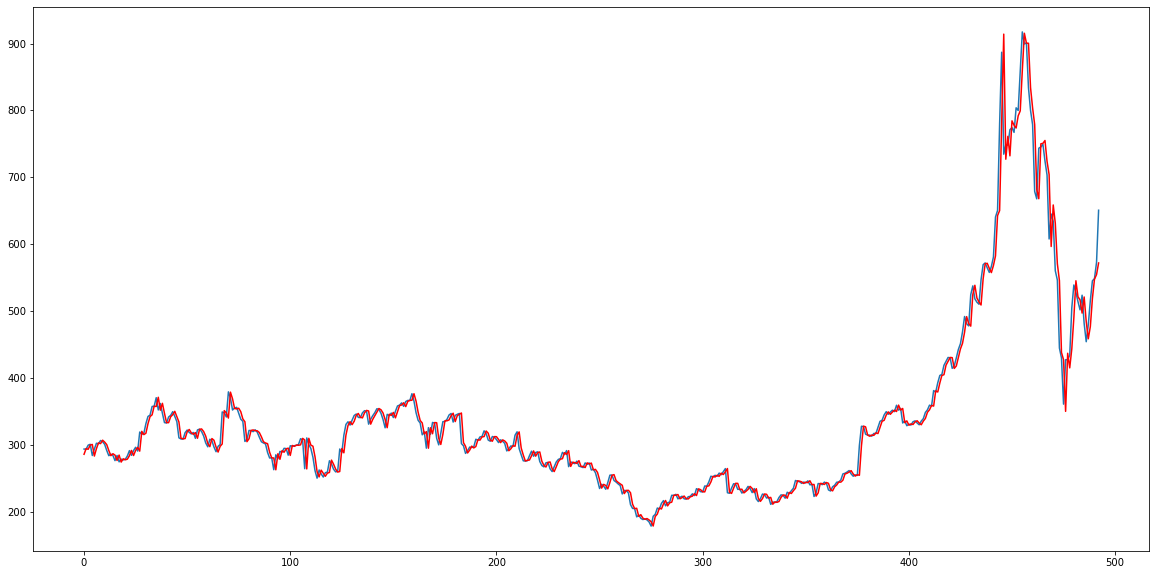

In [13]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [14]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

10.730854403128623
186.8725382967533
35.63137209412088


In [18]:
predictions = arch(cls, 'arch')

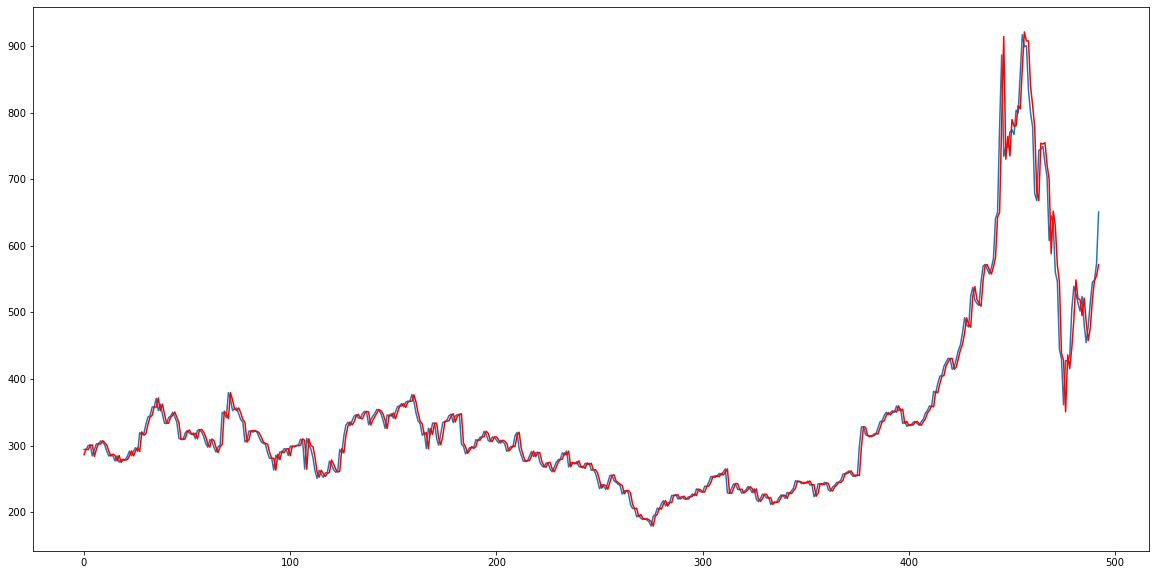

In [12]:
fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(predictions)), cls[int(len(cls) * 0.8):len(cls)])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [20]:
predictions = [item for sublist in predictions for item in sublist]

In [21]:
print(mean_squared_error(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(mean_absolute_error(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(rmse(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(mean_absolute_percentage_error(cls[int(len(cls) * 0.8):len(cls)], predictions))

416.2009809408359
10.799439817852404
20.401004410097947
2.85084249835419


In [22]:
predictions = arch(cls, 'garch')



NameError: name 'avoc1' is not defined

<Figure size 1440x720 with 0 Axes>

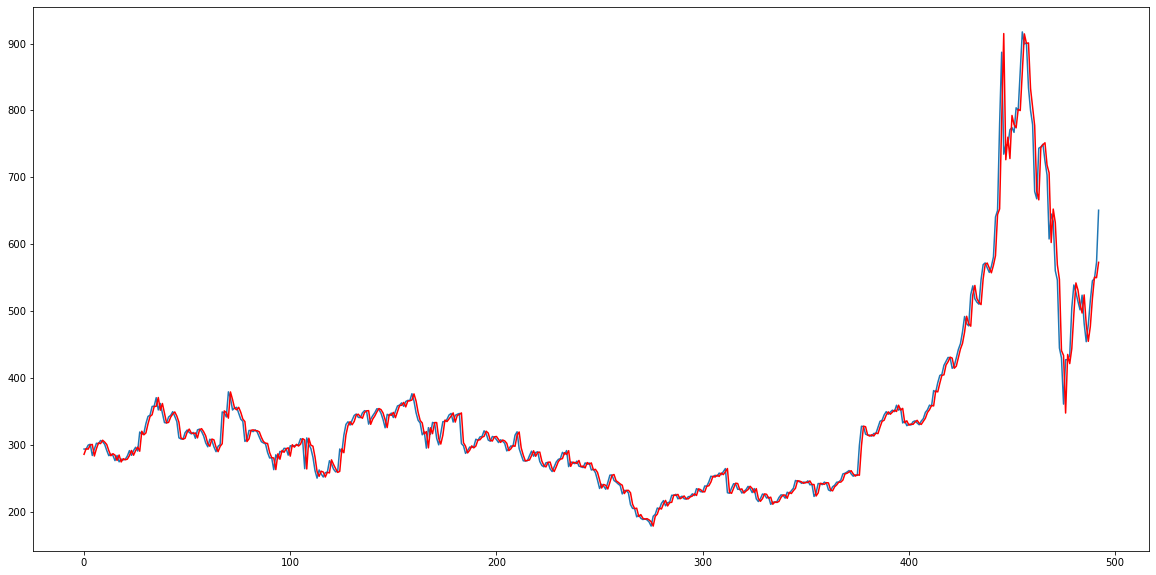

In [23]:
fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(predictions)), cls[int(len(cls) * 0.8):len(cls)])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [24]:
predictions = [item for sublist in predictions for item in sublist]

In [26]:
print(mean_squared_error(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(mean_absolute_error(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(rmse(cls[int(len(cls) * 0.8):len(cls)], predictions))
print(mean_absolute_percentage_error(cls[int(len(cls) * 0.8):len(cls)], predictions))

417.07399247247196
10.710469506505737
20.422389489784784
2.839711856018453
